# Do you know your stroke risk?

Source of the data: https://www.sciencedirect.com/science/article/pii/S0933365719302295?via%3Dihub
Liu, Tianyu; Fan, Wenhui; Wu, Cheng (2019), “Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets”, Mendeley Data, V1, doi: 10.17632/x8ygrw87jw.1

The medical dataset contains 43,400 records of potential patients which includes 783 occurrences of stroke. 

Cerebral stroke has become a significant global public health issue. The ideal solution to this concern is to prevent in advance by controlling related metabolic factors. However, it is difficult for medical staff to decide whether special precautions are needed for a potential patient only based on the monitoring of physiological indicators unless they are obviously abnormal. This project builds a machine learning model to predict whether someone is at risk of having a stroke.

The data in each row includes numerical factors, such as age and average glucose levels, and categorical factors, such as "has heart disease" (yes or no), work type, and smoking status. This is not an exhaustive list. We use this data to determine which factors contribute to having a stroke, and among those which hold the most weight.

### Data Dictionary
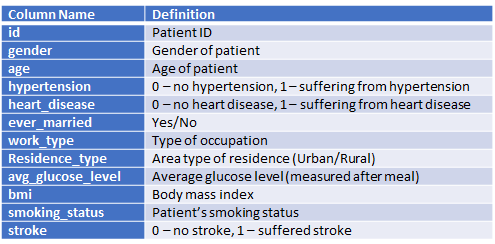

# Step 1: Clean the data and pre-process

## Basic analysis of the input dataset

In [ ]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Read the stroke dataset
input_csv = pd.read_csv("data/stroke_dataset.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

In [ ]:
# Display the input data for preview
input_csv

In [ ]:
# Check the number of unique records using groupby
csv_group = input_csv.groupby("id")
len(csv_group)

## Identify missing values in machine learning dataset

In [ ]:
# Count missing values for each column of the input dataset

input_csv.isnull().sum()

### Options for dealing with missing data:

1. Deleting Rows
1. Replacing With Mean/Median/Mode
1. Assigning An Unique Category
1. Predicting The Missing Values
1. Using Algorithms Which Support Missing Values

In [ ]:
# Count values for each column of the input dataset

input_csv.notnull().sum()

In [ ]:
# List the categorical columns present in the dataset
input_csv.select_dtypes(exclude=np.number).columns

In [ ]:
# List the numerical columns present in the dataset
input_csv.select_dtypes(include=np.number).columns

In [ ]:
# How many people had a stroke.
how_many_people_had_a_stroke = len(input_csv[input_csv["stroke"] == 1])
how_many_people_had_a_stroke

In [ ]:
# Percentage of people who had a stroke
percentage_of_people_who_had_a_stroke = (how_many_people_had_a_stroke / len(input_csv) ) * 100
percentage_of_people_who_had_a_stroke

## Numerical and Categorical Analysis

In [ ]:
# Create list of possible categorical features
possible_categorical_features = ["gender",
                                 "hypertension",
                                 "heart_disease",
                                 "ever_married",
                                 "work_type",
                                 "Residence_type",
                                 "smoking_status"]

# Create list of possible numerical features
possible_numerical_features = ["age",
                               "avg_glucose_level",
                               "bmi"]

In [ ]:
# Make kdeplot for each possible numerical feature
for possible_feature in possible_numerical_features:
    
    # Make two kdeplots,
    # one for the complete dataset,
    # and one for only those who had a stroke
    sns.kdeplot(input_csv[possible_feature])
    sns.kdeplot(input_csv[input_csv["stroke"] == 1][possible_feature])

    # Calculate the mode of the current feature,
    # (for both the complete dataset and the only-stroke-true subset)
    # To include in the plot title
    full_dataset_mode = round(input_csv.mode()[possible_feature][0], 2)
    stroke_true_mode = round(input_csv[input_csv["stroke"] == 1].mode()[possible_feature][0], 2)
    plt.title(f"Feature: {possible_feature}\nMode (full dataset): {full_dataset_mode}\nMode (only those with stroke): {stroke_true_mode}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = input_csv[possible_feature].max()
    column_min = input_csv[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
        
    plt.legend(labels=["Full Dataset", "Only those with stroke"])
    
    plt.show()

#### Observations:

1. In the full dataset, most people appear to have an age close to 51. For those who had a stroke, most people have an age close to 79.
2. In the the full dataset, most people appear to have an average glucose level (AGL) close to 82.71. For those who had a stroke, most people have an AGL close to 74.95. In both cases, the frequency of AGLs drop sharply after this value, though there is a slight spike in frequency for individuals with an average glucose level just over 160. 
3. In the full dataset, most people appear to have a BMI close to 27.7. For those who had a stroke, most people have a BMI close to 26.4.

In [ ]:
# Make a regplot for each potential numerical feature
for possible_feature in possible_numerical_features:
    sns.regplot(x=possible_feature, y="stroke", data=input_csv, fit_reg=False, y_jitter=0.1)
    plt.title(f"Individuals who had a stroke based on {possible_feature}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = input_csv[possible_feature].max()
    column_min = input_csv[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
    plt.show()

#### Observations:

1. Those who did not have a stroke could be any age, while those who did have a stroke are most heavily concentrated in the 50+ years age group. There is a smaller but still sizable number of people in the range of 40-50 years old, and an even smaller but still sizable number of people in the range of 30-40 years old. Very few people below the age of 30 had a stroke.
2. Those who did not have a stroke could have any average glucose level (AGL) in the approximate range of 60 to 270. A smaller but still sizable number of people exceed an AGL of 270. Those who did have a stroke are concentrated in two separate ranges. The first range is from approximately 60 to approximately 120; the second range is from approximately 180 to approximately 240.  There is a noticeable gap between an AGL of about 120 to 180, where there are fewer data points.
3. Those who did not have a stroke could have any BMI in the approximate range of 10 to 60. A smaller but still sizable number of people have a BMI exceeding 60 also did not have a strok. Very few people have a BMI exceeding 72. Those who did have a stroke are concentrated in the approximate BMI range of 20 to 40. Very few people have a BMI of less than 20. A smaller but still sizeable number of people exceed a BMI of 40, and no one has a BMI over 60.

## gender

In [ ]:
# Overview of gender
input_csv["gender"].value_counts()

In [ ]:
# Get the exact number of people in each gender group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["gender"].value_counts())

## age

In [ ]:
# Overview of age
input_csv["age"].value_counts()

In [ ]:
input_csv["age"].max()

In [ ]:
# Histogram of Age
from matplotlib.ticker import StrMethodFormatter

ax = input_csv.hist(column='age', bins=25, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
# Density of age grouped by stroke
plt.figure(figsize=(8,4))
input_csv.groupby("stroke").age.plot(kind='kde')
plt.title("Density of age grouped by stroke")

plt.legend()
plt.show()

In [ ]:
# Density of age grouped by hypertension
plt.figure(figsize=(8,4))
input_csv.groupby("hypertension").age.plot(kind='kde')
plt.title("Density of age grouped by hypertension")

plt.legend()
plt.show()

In [ ]:
# Density of age grouped by heart_disease
plt.figure(figsize=(8,4))
input_csv.groupby("heart_disease").age.plot(kind='kde')
plt.title("Density of age grouped by heart_disease")

plt.legend()
plt.show()

## Categorize age

In [ ]:
# Create the bins in which Data will be held
bins = [0, 19, 29, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 100]

# Create the names for the five bins
group_labels = ["<20", "20-29", "30-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", ">84"]

In [ ]:
input_csv["age_group"] = pd.cut(input_csv["age"], bins, labels=group_labels)
input_csv

In [ ]:
# Creating a group based off of the bins
age_group = input_csv.groupby("age_group")
age_group[["stroke", "hypertension", "heart_disease"]].sum()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Visualize how many people did and did not have a stroke
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(input_csv["age_group"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(input_csv[input_csv["stroke"] == 1]["age_group"])
plt.title("Only those who had stroke")

plt.show()

## hypertension

In [ ]:
# Overview of hypertension
input_csv["hypertension"].value_counts()

In [ ]:
# Get the exact number of people in each hypertension group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["hypertension"].value_counts())

## heart_disease

In [ ]:
# Overview of heart_disease
input_csv["heart_disease"].value_counts()

In [ ]:
# Get the exact number of people in each heart_disease group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["heart_disease"].value_counts())

## ever_married

In [ ]:
# Overview of ever_married
input_csv["ever_married"].value_counts()

In [ ]:
# Get the exact number of people in each ever_married group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["ever_married"].value_counts())

## work_type

In [ ]:
# Overview of work_type
input_csv["work_type"].value_counts()

In [ ]:
# Get the exact number of people in each work_type group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["work_type"].value_counts())

In [ ]:
# In the cell above, we noticed that, despite making up as much as about 14.18% of the complete dataset,
# those whose work type is "children" make up only about 0.26% of those who had a stroke

# As "children" isn't very clear, we decide to check the max age for indiviudals with this work type

input_csv[input_csv["work_type"] == "children"]["age"].max()

We can observe from the cell above that the oldest person with work type "children" is 16 - a pretty low age. We therefore assume that a work type of "children" means this person is a child, and has no job.

## Residence_type

In [ ]:
# Overview of Residence_type
input_csv["Residence_type"].value_counts()

In [ ]:
# Get the exact number of people in each Residence_type group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["Residence_type"].value_counts())

## avg_glucose_level

In [ ]:
# Overview of avg_glucose_level
input_csv["avg_glucose_level"].value_counts()

## Categorize avg_glucose_level

In [ ]:
# Create the bins in which Data will be held
bins = [0, 139.99, 199.99, 300]

# Create the names for the five bins
group_labels = ["Normal", "Prediabetes", "T2 Diabetes"]

In [ ]:
input_csv["glucose_group"] = pd.cut(input_csv["avg_glucose_level"], bins, labels=group_labels)
input_csv

In [ ]:
# Creating a group based off of the bins
glucose_group = input_csv.groupby("glucose_group")
glucose_group[["stroke", "hypertension", "heart_disease"]].sum()

In [ ]:
# Visualize how many people did and did not have a stroke
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(input_csv["glucose_group"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(input_csv[input_csv["stroke"] == 1]["glucose_group"])
plt.title("Only those who had stroke")

plt.show()

## bmi

In [ ]:
# Overview of bmi
input_csv["bmi"].value_counts()

In [ ]:
# How many unique values in bmi column
input_csv["bmi"].nunique()

In [ ]:
# Null bmi
print(input_csv["bmi"].isnull().sum())

In [ ]:
# Null bmi with and without stroke
input_csv.loc[input_csv["bmi"].isna(), "stroke"].value_counts()

In [ ]:
# Analyze records with null bmi
rslt_df = input_csv.loc[input_csv["bmi"].isnull()]
rslt_df

In [ ]:
rslt_df2 = rslt_df.loc[input_csv["stroke"] == 1]
rslt_df2

In [ ]:
rslt_df2.loc[rslt_df2["bmi"].isna(), "hypertension"].value_counts()

In [ ]:
rslt_df2.loc[rslt_df2["bmi"].isna(), "heart_disease"].value_counts()

In [ ]:
rslt_df2.loc[rslt_df2["bmi"].isna(), "glucose_group"].value_counts()

In [ ]:
# Calculate the mean and standard deviation BMI value
bmi_mean = input_csv["bmi"].mean()
bmi_standard_deviation = input_csv["bmi"].std()
print(f"BMI mean: {bmi_mean}\nBMI standard deviation: {bmi_standard_deviation}", "\n")

In [ ]:
# Calculate what percent of the data is 1, 2, and 3 standard deviations from the mean
percent_of_data_1_standard_deviations_from_mean = round((len(input_csv[(input_csv["bmi"] > bmi_mean + bmi_standard_deviation)\
                                                     | (input_csv["bmi"] < bmi_mean - bmi_standard_deviation)]) / len(input_csv)) * 100, 2)

percent_of_data_2_standard_deviations_from_mean = round((len(input_csv[(input_csv["bmi"] > bmi_mean + (2 * bmi_standard_deviation))\
                                                     | (input_csv["bmi"] < bmi_mean - (2 * bmi_standard_deviation))]) / len(input_csv)) * 100, 2)

percent_of_data_3_standard_deviations_from_mean = round((len(input_csv[(input_csv["bmi"] > bmi_mean + (3 * bmi_standard_deviation))\
                                                     | (input_csv["bmi"] < bmi_mean - (3 * bmi_standard_deviation))]) / len(input_csv)) * 100, 2)

print(f"Percent of data 1 standard deviation from mean: {percent_of_data_1_standard_deviations_from_mean}")
print(f"Percent of data 2 standard deviations from mean: {percent_of_data_2_standard_deviations_from_mean}")
print(f"Percent of data 3 standard deviations from mean: {percent_of_data_3_standard_deviations_from_mean}")

## Working with missing bmi data

### Options for dealing with missing bmi data:

1. Deleting Rows
1. Replacing With Mean/Median/Mode
1. Assigning An Unique Category
1. Predicting The Missing Values
1. Using Algorithms Which Support Missing Values

In [ ]:
print(f"Mean bmi: {input_csv['bmi'].mean()}")
print(f"Median bmi: {input_csv['bmi'].median()}")
print(f"Mode bmi: {input_csv.mode()['bmi'][0]}")

In [ ]:
# Since the median bmi value is equal to the mode bmi value, fill NaN values with the median bmi
input_csv["bmi"].fillna(input_csv["bmi"].median(), inplace=True)

In [ ]:
# Confirm no NaN values in the "bmi" column
input_csv.isna().sum()

## Categorize bmi

In [ ]:
# Create the bins in which Data will be held
bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 60, 100]

# Create the names for the five bins
group_labels = ["<18.5", "18.5-24.9", "25-29.9", "30-34.9", "35-39.9", "40-44.9", "45-49.9", "50-59.9", ">60"]

In [ ]:
input_csv["bmi_group1"] = pd.cut(input_csv["bmi"], bins, labels=group_labels)
input_csv

In [ ]:
# Create the bins in which Data will be held
bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 60, 100]

# Create the names for the bins
group_labels = ["Underweight", "Normal weight", "Overweight", "Obese Class I (Moderately obese)", "Obese Class II (Severely obese)", "Obese Class III (Very severely obese)", "Obese Class IV (Morbidly Obese)", "Obese Class V (Super Obese)", "Obese Class VI (Hyper Obese)"]

In [ ]:
input_csv["bmi_group"] = pd.cut(input_csv["bmi"], bins, labels=group_labels)
input_csv

In [ ]:
# Creating a group based off of the bins
bmi_group = input_csv.groupby("bmi_group")
bmi_group[["stroke", "hypertension", "heart_disease"]].sum()

In [ ]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi_group1")
bmi_group2[["stroke", "hypertension", "heart_disease"]].sum()

In [ ]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi_group")
bmi_group2["age"].mean()

In [ ]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi_group")
bmi_group2["id"].count()

In [ ]:
# Visualize how many people did and did not have a stroke
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(input_csv["bmi_group"])
plt.title("Complete Dataset")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(input_csv[input_csv["stroke"] == 1]["bmi_group"])
plt.title("Only those who had stroke")
plt.xticks(rotation=90)

plt.show()

## smoking_status

In [ ]:
# Overview of smoking_status
input_csv["smoking_status"].value_counts()

In [ ]:
# Get the exact number of people in each smoking group that had a stroke
print(input_csv[input_csv["stroke"] == 1]["smoking_status"].value_counts())

In [ ]:
# Null smoking_status

print(input_csv["smoking_status"].isnull().sum())

In [ ]:
# Visualize how many people did and did not have a stroke
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(input_csv["smoking_status"])
plt.title("Complete Dataset")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(input_csv[input_csv["stroke"] == 1]["smoking_status"])
plt.title("Only those who had stroke")
plt.xticks(rotation=90)

plt.show()

## Missing smoking_status data

### Choosing the right Encoding method - Label vs OneHot Encoder
We will not fill in these NaNs and use use OneHot Encoder once we get to the Machine Learning notebook

In [ ]:
# Get the exact number of people in each group of the entire dataset
print(input_csv["smoking_status"].value_counts(), "\n")

# Get the exact number of people in each group,
# after filtering to just those who had a stroke
print(input_csv[input_csv["stroke"] == 1]["smoking_status"].value_counts())

## stroke

In [ ]:
# Overview of stroke
input_csv["stroke"].value_counts()

In [ ]:
input_csv

## Model Building

### Feature selection

From our analysis, we determine that our features should be:

#### Categorical:
1. hypertension
2. heart_disease
3. ever_married
4. work_type
5. smoking status
6. gender
7. residence_type

#### Numerical:
1. age
2. average glucose level
3. bmi

### Replace string data with numeric

In [ ]:
stroke_df = input_csv.copy(deep=True)

In [ ]:
Gender = {"Other":2,"Male":1, "Female":0}
Married = {"Yes":1, "No":0}
# Work_Type = {"Private":0, "Self-employed":1, "children":2, "Govt_job":3,"Never_worked":4}
Residence = {"Urban":0, "Rural":1}
# Smoking = {"never smoked":0, "formerly smoked":1, "smokes":2, "unknown":3}
# BMI = {"Normal weight":0, "unknown":1, "Underweight":2, "Overweight":3, "Obese Class I (Moderately obese)":4,
#      "Obese Class II (Severely obese)":5, "Obese Class III (Very severely obese)":6, "Obese Class IV (Morbidly Obese)":7,
#      "Obese Class V (Super Obese)":8, "Obese Class VI (Hyper Obese)":9}
# Glucose = {"Normal":0, "Prediabetes":1, "T2 Diabetes":2}

In [ ]:
stroke_df = stroke_df.replace({"gender":Gender, 
                               "ever_married":Married, 
                               "Residence_type":Residence})

In [ ]:
stroke_df

In [ ]:
# We don't want to work with unique identifiers so we will drop the id column

stroke_clean = stroke_df.drop(["id"], axis=1)
stroke_clean.head()

In [ ]:
# Make new dataframe only including relevant features
stroke_data = pd.DataFrame()

# Add categorical features to dataframe
stroke_data["hypertension"] = stroke_clean["hypertension"]
stroke_data["heart_disease"] = stroke_clean["heart_disease"]
stroke_data["ever_married"] = stroke_clean["ever_married"]
stroke_data["work_type"] = stroke_clean["work_type"]
stroke_data["smoking_status"] = stroke_clean["smoking_status"]
stroke_data["gender"] = stroke_clean["gender"]
stroke_data["Residence_type"] = stroke_clean["Residence_type"]

# Add numerical features to dataframe
stroke_data["age"] = stroke_clean["age"]
stroke_data["average_glucose_level"] = stroke_clean["avg_glucose_level"]
stroke_data["bmi"] = stroke_clean["bmi"]

# Add label to dataframe
stroke_data["stroke"] = stroke_clean["stroke"]

# Preview our new dataframe
stroke_data


In [ ]:
# Our initial analysis is complete and we'll export this dataframe as a csv file, and perform the Machine Learning in a new notebook.
import os

# Export final DataFrame as csv
stroke_data.to_csv("data/stroke_ML_dataset.csv", index=False, header=True)